In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the training data

In [173]:
train_data = pd.read_csv(r"C:\Users\hp\Downloads\archive (4)\training_data.csv")
train_data.head(25) 

,Patient ID,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.90,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.10,False,Present,AV+MV+PV+TV,TV,...,III/VI,High,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.10,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.90,False,Present,TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.20,False,Present,AV+MV+PV+TV,PV,...,II/VI,Low,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
5,14998,AV+PV+TV+MV,Child,Male,NaN,NaN,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
6,23625,AV+PV+TV+MV,Child,Female,92.0,14.00,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,50379.0
7,24160,AV+PV+TV+MV,Child,Female,98.0,17.66,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
8,29045,AV+PV+TV+MV,Child,Female,88.0,12.50,False,Present,AV+MV+PV+TV,TV,...,II/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
9,29378,AV+MV,Child,Female,82.0,10.70,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN


# Basic summary of the dataset


In [6]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Locations                 942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826 non-null    float64
 5   Weight                    837 non-null    float64
 6   Pregnancy status          942 non-null    bool   
 7   Murmur                    942 non-null    object 
 8   Murmur locations          179 non-null    object 
 9   Most audible location     179 non-null    object 
 10  Systolic murmur timing    178 non-null    object 
 11  Systolic murmur shape     178 non-null    object 
 12  Systolic murmur grading   178 non-null    object 
 13  Systolic murmur pitch     178 non-null    object 
 14  Systolic m

# Observations from the basic summary

1. There are 22 columns in this dataset
2. Out of these columns, there exist bool, int, float, object data types
3. Only six columns do not have missing values



# Relationship between the patient age and their murmur classification

             Murmur
Age                
Adolescent       69
Child           649
Infant          211
Neonate           6
Young Adult       7
*****************************************************
         Age
Murmur      
Absent   695
Present  179
Unknown   68
**********************************************
            Age   Murmur  count_total
0    Adolescent   Absent           49
1    Adolescent  Present           17
2    Adolescent  Unknown            3
3         Child   Absent          497
4         Child  Present          122
5         Child  Unknown           30
6        Infant   Absent          139
7        Infant  Present           38
8        Infant  Unknown           34
9       Neonate   Absent            4
10      Neonate  Present            1
11      Neonate  Unknown            1
12  Young Adult   Absent            6
13  Young Adult  Present            1
**************************************************


<AxesSubplot:xlabel='Age', ylabel='count_total'>

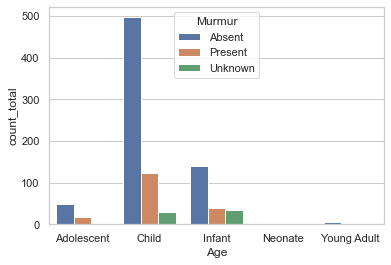

In [172]:
#extract age and murmurs from the training data
patient_age = train_data['Age'].fillna(method='ffill', inplace = True) #filling the 74 missing values in 'age' column
age_murmur = train_data.loc[:, ['Age', 'Murmur']]

#group by age
by_age = age_murmur.groupby('Age').count()
print(by_age)
print('*****************************************************')

#group by murmur
by_murmur = age_murmur.groupby('Murmur').count()
print(by_murmur)
print('**********************************************')

#by both murmur and age and add a total column then plot
by_murmur_age = age_murmur.groupby(['Age','Murmur']).size()
by_murmur_age.name= 'count_total'
by_murmur_age = by_murmur_age.reset_index()
print(by_murmur_age)
print('**************************************************')

sns.barplot(x='Age', y='count_total', hue='Murmur', data=by_murmur_age)

# Observations from the relationship between the patient age and their murmur classification

1. Age has 74 missing values, which we filled using forward filling method.
2. Age is categorized into five broad 'categories', and its an object type not an int
3. Many of the heart murmurs belong to children and infants


# Relationship between sex and murmur classification


      Sex   Murmur
0  Female   Absent
1  Female  Present
2    Male  Unknown
3    Male  Present
4    Male  Present
***********************************
        Murmur
Sex           
Female     486
Male       456
*************************************
         Sex
Murmur      
Absent   695
Present  179
Unknown   68
**************************************
      Sex   Murmur  Total
0  Female   Absent    355
1  Female  Present     92
2  Female  Unknown     39
3    Male   Absent    340
4    Male  Present     87
5    Male  Unknown     29


<AxesSubplot:xlabel='Sex', ylabel='Total'>

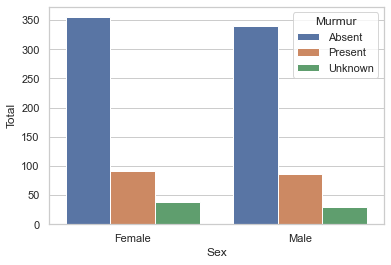

In [134]:
#extract the sex and murmur and put them into a dataframe
sex_murmur = train_data.loc[:,['Sex','Murmur']]
print(sex_murmur.head())
print('***********************************')

#groupby female
by_female = sex_murmur.groupby(by= 'Sex').count()
print(by_female)
print('*************************************')

#groupby murmur
by_murmur = sex_murmur.groupby('Murmur').count()
print(by_murmur)
print('**************************************')

#groupby both murmur and sex then count each group the plot
by_both = sex_murmur.groupby(['Sex','Murmur'])
count_groups = by_both.size() #count the values in values in the group
count_groups.name = 'Total' #add column total
count_groups = count_groups.reset_index()
print(count_groups)
sns.set_theme(style="whitegrid")
sns.barplot(x='Sex', y='Total', hue='Murmur', data=count_groups)

# Observations from the relationship between the sex and murmur classification

1. There is more data on female than male.
2. Most female and male dont have murmurs (murmurs classified as absent)
3. While there is a small number of male and female whose hearts' sounds were not identified as with or without murmurs (Murmur classified as unknown)
4. Data about patient sex and their corresponding murmur classification existed (that is no missing data).

# Relationship between the weight and height (BMI) of the patients and their murmur classification



   Height  Weight   Murmur
0    98.0   15.90   Absent
1   103.0   13.10  Present
2   115.0   19.10  Unknown
3    98.0   15.90  Present
4    87.0   11.20  Present
5     NaN     NaN   Absent
6    92.0   14.00   Absent
7    98.0   17.66   Absent
8    88.0   12.50  Present
9    82.0   10.70  Unknown
****************************************************
0    16.555602
1    12.348006
2    14.442344
3    16.555602
4    14.797199
dtype: float64


<AxesSubplot:ylabel='Count'>

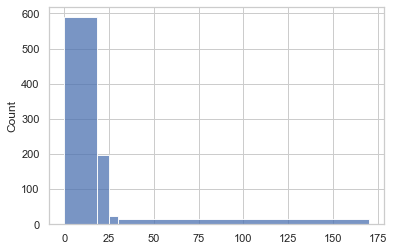

In [151]:
#aggregate the sex using weight
height_weight_murmur = train_data.loc[:,['Height','Weight','Murmur']]
print(height_weight_murmur.head(10))
print('****************************************************')


#calculate bmi
weight = height_weight_murmur['Weight']
height = height_weight_murmur['Height']
bmi = weight/(height/100*height/100)
print(bmi.head())

#plot bmi classes
sns.histplot(data=bmi, bins=[0,18.5,24.9,29.9,170])




# Relationship between murmur location and murmur classification (as present/absent/unknown)


# Relationship betweeen most audible murmur and murmur location